In [1]:
from buster import sampler, plots
import skopt.space as sp
import math

# specify two dimensions, the first as an int, the second as a float
space = sp.Space([
    sp.Integer(-100, 100, name="integer"),
    sp.Real(-100.0, 100.0, name="real"),
    sp.Categorical(['cat', 'dog', 'rabbit'], name="categorical")
])

sampler = sampler.AdaptiveSampler(space.dimensions,
                                            random_state=1,
                                            n_initial_points=500)


In [2]:
# here we create a function which takes a list of sample points and returns
# the inference result from them

def func(X):

  def in_radius(c_x, c_y, r, x, y):
    return math.hypot(c_x - x, c_y - y) <= r

  answer = []
  for x, y, a in X:
    if a == 'rabbit':
      answer.append(in_radius(50, 50, 20, x, y))
    elif a == 'cat':
      answer.append(in_radius(20, 20, 10, x, y))
    elif a == 'dog':
      answer.append(in_radius(60, 60, 30, x, y))

  return answer

array([[<AxesSubplot:xlabel='$X_{0}$', ylabel='Number of samples'>,
        <AxesSubplot:>],
       [<AxesSubplot:xlabel='$X_{0}$', ylabel='$X_{1}$'>,
        <AxesSubplot:xlabel='$X_{1}$', ylabel='Number of samples'>]],
      dtype=object)

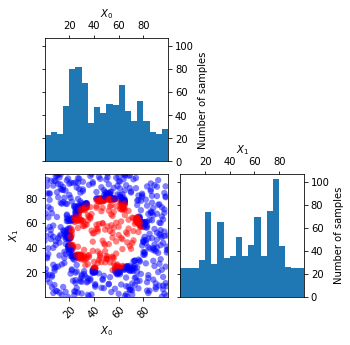

In [3]:
sampler.run(func, n_iter=20)

result = sampler.get_result()

plots.plot_evaluations(result)

interactive(children=(Dropdown(description='x_dim', options=('X_0', 'X_1'), value='X_0'), Dropdown(description…

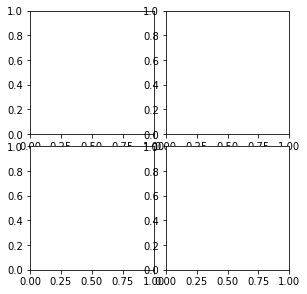

In [4]:
plots.plot_evaluations_ipy(result)